In [1]:
%matplotlib notebook
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import random

In [2]:
def pad_arr(l, max_dur=0):
    temp = []
    for ar in l:
        npad = ((0,max_dur-ar.shape[0]), (0,0))
        arr = np.pad(ar, pad_width=npad, mode='constant', constant_values=-1)
        temp.append(arr)
    return temp

In [20]:
def get_data_from_mat(file_path, output_index=None, type='pre_pn'):
    data = scipy.io.loadmat(file_path)
    duration = []
    amp = []
    pb_fr_pn = []
    pb_fr_itn = []
    pb_aff_pn = []
    pb_aff_itn = []
    pb_exc_pn = []
    pb_inh_pn = []
    pb_exc_itn = []
    pb_inh_itn = []
    pb_lfp = []
    wb_fr_pn = []
    wb_fr_itn = []
    wb_aff_pn = []
    wb_aff_itn = []
    wb_exc_pn = []
    wb_inh_pn = []
    wb_exc_itn = []
    wb_inh_itn = []
    wb_lfp = []

#     print(data['info_collect'][0])
#     print(data['info_collect'].shape[0])
    for i in range(1, data['info_collect'].shape[0]):
        arr = data['info_collect'][i]
        
#         print(arr.shape)
        
        duration.append(arr[0])
        amp.append(arr[1])
        
        pb_fr_pn.append(arr[2])
        pb_fr_itn.append(arr[3])
        pb_aff_pn.append(arr[4])
        pb_aff_itn.append(arr[5])
        pb_exc_pn.append(arr[6])
        pb_inh_pn.append(arr[7])
        pb_exc_itn.append(arr[8])
        pb_inh_itn.append(arr[9])
        pb_lfp.append(arr[10])
        
        wb_fr_pn.append(arr[11])
        wb_fr_itn.append(arr[12])
        wb_aff_pn.append(arr[13])
        wb_aff_itn.append(arr[14])
        wb_exc_pn.append(arr[15])
        wb_inh_pn.append(arr[16])
        wb_exc_itn.append(arr[17])
        wb_inh_itn.append(arr[18])
        wb_lfp.append(arr[19])

    min_dur = 1000
    max_dur = 0
    for i, ar in enumerate(wb_fr_pn):
        if ar.shape[0] < min_dur:
            min_dur = ar.shape[0]
            mi = i
        if ar.shape[0] > max_dur:
            max_dur = ar.shape[0]
            ma = i
            
#     print(ma)
#     print(max_dur)
    
#     wb_fr_pn = pad_arr(wb_fr_pn, max_dur)

#     wb_fr_itn = pad_arr(wb_fr_itn, max_dur)
    
#     wb_aff_pn = pad_arr(wb_aff_pn, max_dur)
    
#     wb_aff_itn = pad_arr(wb_aff_itn, max_dur)
    
#     wb_exc_pn = pad_arr(wb_exc_pn, max_dur)
    
#     wb_inh_pn = pad_arr(wb_inh_pn, max_dur)
    
#     wb_exc_itn = pad_arr(wb_exc_itn, max_dur)
    
#     wb_inh_itn = pad_arr(wb_inh_itn, max_dur)

#     wb_lfp = pad_arr(wb_lfp, max_dur)
    print(pb_fr_pn[0].shape)
    print(wb_fr_pn[0].shape)
#     for a in pb_fr_pn:
#         print(a.shape)
#     print('-------------------------------')
#     for b in wb_fr_pn:
#         print(b.shape)
    t1, t2, t3, t4, t5, t6, t7, t8, t9 = [],[],[],[],[],[],[],[],[] 
    for i, pb in enumerate(pb_fr_pn):
        t1.append(np.concatenate((pb, wb_fr_pn[i]), axis=0))
    
    for i, pb in enumerate(pb_fr_itn):
        t2.append(np.concatenate((pb, wb_fr_itn[i]), axis=0))
    
    for i, pb in enumerate(pb_aff_pn):
        t3.append(np.concatenate((pb, wb_aff_pn[i]), axis=0))
    
    for i, pb in enumerate(pb_aff_itn):
        t4.append(np.concatenate((pb, wb_aff_itn[i]), axis=0))
    
    for i, pb in enumerate(pb_exc_pn):
        t5.append(np.concatenate((pb, wb_exc_pn[i]), axis=0))
    
    for i, pb in enumerate(pb_inh_pn):
        t6.append(np.concatenate((pb, wb_inh_pn[i]), axis=0))
    
    for i, pb in enumerate(pb_exc_itn):
        t7.append(np.concatenate((pb, wb_exc_itn[i]), axis=0))
    
    for i, pb in enumerate(pb_inh_itn):
        t8.append(np.concatenate((pb, wb_inh_itn[i]), axis=0))
    
    for i, pb in enumerate(pb_lfp):
        t9.append(np.concatenate((pb, wb_lfp[i]), axis=0))
    
#     full_labels = np.concatenate((pb_fr_pn, pb_fr_itn, pb_lfp), axis=2)
    
#     front_data = np.concatenate((pb_fr_pn, pb_fr_itn, pb_aff_pn, pb_aff_itn,pb_exc_pn, 
#                                  pb_inh_pn, pb_exc_itn, pb_inh_itn, pb_lfp), axis=2)
    
#     rear_data = np.concatenate((wb_fr_pn, wb_fr_itn, wb_aff_pn, wb_aff_itn,
#                                 wb_exc_pn, wb_inh_pn, wb_exc_itn, wb_inh_itn, wb_lfp), axis=2)
    
#     full_data = rear_data

#     full_labels = np.concatenate((t1,t2,t9),axis=2)
    full_labels = [t1,t2,t9]
    full_data = [t1,t2,t3,t4,t5,t6,t7,t8,t9]
#     full_data = np.concatenate((t1,t2,t3,t4,t5,t6,t7,t8,t9), axis=2)
    
#     for j in range(3):
#         x = full_labels[:,:,j]
#         full_labels[:,:,j] = (x - np.min(x))/(np.max(x)-np.min(x))
    
#     for i in range(full_data.shape[0]):
#         for j in range(input_size):
#             x = full_data[i,:,j]
#             full_data[i,:,j] = (x - np.min(x))/(np.max(x)-np.min(x))

    return full_data, full_labels
# get_data_from_mat('data/bursts/burst_separatePNITNv2.mat')

(50, 1)
(100, 1)


<IPython.core.display.Javascript object>


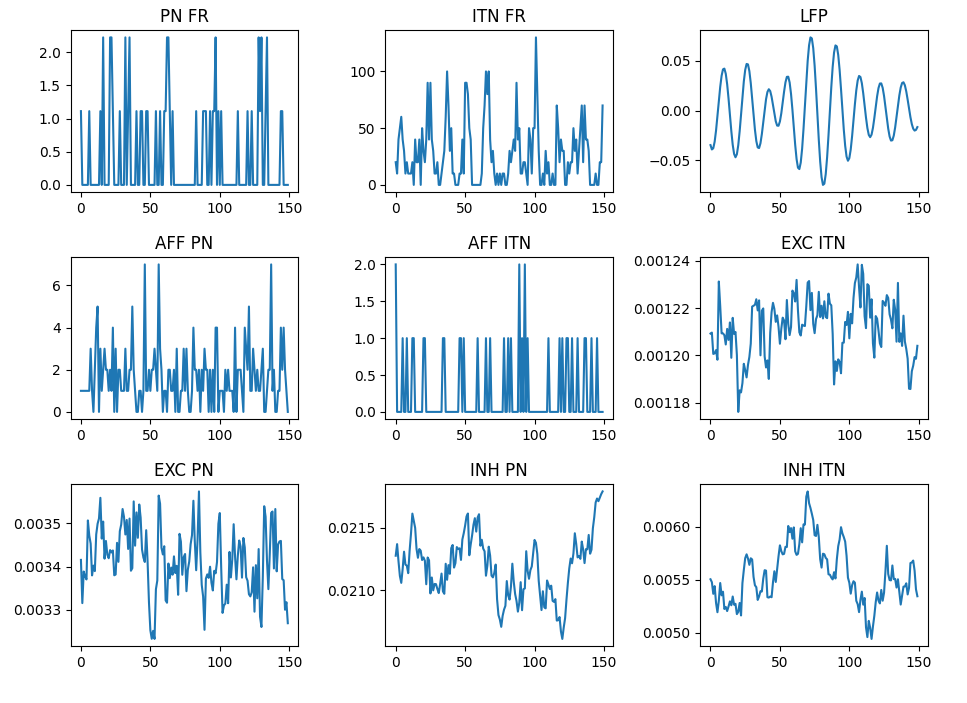

In [24]:
data, labels = get_data_from_mat('data/bursts/burst_separatePNITNv2.mat')
sample = 0
time_s = np.arange(len(data[0][sample]))

fig, axs = plt.subplots(3,3)
fig.tight_layout()
axs[0,0].plot(time_s, data[0][sample])
axs[0,0].set_title('PN FR')
axs[0,1].plot(time_s, data[1][sample])
axs[0,1].set_title('ITN FR')
axs[0,2].plot(time_s, data[8][sample])
axs[0,2].set_title('LFP')
axs[1,0].plot(time_s, data[2][sample])
axs[1,0].set_title('AFF PN')
axs[1,1].plot(time_s, data[3][sample])
axs[1,1].set_title('AFF ITN')
axs[1,2].plot(time_s, data[6][sample])
axs[1,2].set_title('EXC ITN')
axs[2,0].plot(time_s, data[4][sample])
axs[2,0].set_title('EXC PN')
axs[2,1].plot(time_s, data[5][sample])
axs[2,1].set_title('INH PN')
axs[2,2].plot(time_s, data[7][sample])
axs[2,2].set_title('INH ITN')

plt.show()

In [ ]:
data, labels = get_data_from_mat('data/new_bursts.mat')
time_s = np.arange(data.shape[1])
sample = 0
feature = 3
fig, axs = plt.subplots(3,2)
fig.tight_layout()
axs[0,0].plot(time_s, data[sample,:,feature])
axs[0,0].set_title('Sample 0')
axs[0,1].plot(time_s, data[sample+1,:,feature])
axs[0,1].set_title('Sample 1')
axs[1,0].plot(time_s, data[sample+2,:,feature])
axs[1,0].set_title('Sample 2')
axs[1,1].plot(time_s, data[sample+3,:,feature])
axs[1,1].set_title('Sample 3')
axs[2,0].plot(time_s, data[sample+4,:,feature])
axs[2,0].set_title('Sample 4')
axs[2,1].plot(time_s, data[sample+5,:,feature])
axs[2,1].set_title('Sample 5')

plt.show()